# Zonal and Meridional profiles 

This notebook shows how to plot the zonal or meridional profiles for a variable of choice.

In [ ]:
%reload_ext autoreload
%autoreload 2

In [1]:
from aqua import Reader, plot_lat_lon_profiles

We import some sample data, specifically the monthly ERA5 dataset:

In [ ]:
reader = Reader(model="ERA5", exp="era5", source="monthly")
data = reader.retrieve()

2025-06-04 18:50:56 :: ConfigPath :: WARNING  -> No paths found in the main configuration file {'ci': {'catalog': ['ci', 'climatedt-e25.1', 'mn5-phase2', 'nextgems4', 'lumi-phase2', 'lumi-phase1', 'climatedt-phase1', 'obs'], 'machine': 'lumi', 'reader': {'catalog': '/users/cadaumar/.aqua/catalogs/ci/catalog.yaml', 'machine': '/users/cadaumar/.aqua/catalogs/ci/machine.yaml', 'fixer': '/users/cadaumar/.aqua/fixes', 'regrid': '/users/cadaumar/.aqua/grids'}, 'options': {'style': 'aqua'}}, 'climatedt-e25.1': {'catalog': ['ci', 'climatedt-e25.1', 'mn5-phase2', 'nextgems4', 'lumi-phase2', 'lumi-phase1', 'climatedt-phase1', 'obs'], 'machine': 'lumi', 'reader': {'catalog': '/users/cadaumar/.aqua/catalogs/climatedt-e25.1/catalog.yaml', 'machine': '/users/cadaumar/.aqua/catalogs/climatedt-e25.1/machine.yaml', 'fixer': '/users/cadaumar/.aqua/fixes', 'regrid': '/users/cadaumar/.aqua/grids'}, 'options': {'style': 'aqua'}}, 'mn5-phase2': {'catalog': ['ci', 'climatedt-e25.1', 'mn5-phase2', 'nextgems4'

This is how the dataset is characterised:

In [4]:
data

<xarray.Dataset> Size: 226GB
Dimensions:   (time: 1008, lon: 1440, lat: 721, plev: 8)
Coordinates:
  * time      (time) datetime64[ns] 8kB 1940-01-01 1940-02-01 ... 2023-12-01
  * lon       (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * lat       (lat) float64 6kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * plev      (plev) float64 64B 1e+03 5e+03 1e+04 ... 7e+04 8.5e+04 1e+05
Data variables: (12/26)
    2t        (time, lat, lon) float32 4GB dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    ie        (time, lat, lon) float32 4GB dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    hcc       (time, lat, lon) float32 4GB dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    lcc       (time, lat, lon) float32 4GB dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    msl       (time, lat, lon) float32 4GB dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    mcc       (time, lat, lon) float32 4GB dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    ...        ...
    tnlwrfcs  (time, lat, lon) float32 4GB dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    tnlwrf    (time, lat, lon) float32 4GB dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    tcc       (time, lat, lon) float32 4GB dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    tprate    (time, lat, lon) float32 4GB dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    u         (time, plev, lat, lon) float32 33GB dask.array<chunksize=(12, 1, 721, 1440), meta=np.ndarray>
    v         (time, plev, lat, lon) float32 33GB dask.array<chunksize=(12, 1, 721, 1440), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.2.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Fri Apr 05 04:30:18 2024: cdo -O -s -f nc4 -z zip -cat /wor...
    CDO:          Climate Data Operators version 2.2.0 (https://mpimet.mpg.de...

We select the first variable, `tos`:

In [5]:
tos = data["tos"]
tos_plot = tos.isel(time=1)

## Single profile with one variable

And this is how the single zonal profile can be plotted. By specifying the `mean_type` parameter between zonal and meridional, we can choose which profile type to be plotted.

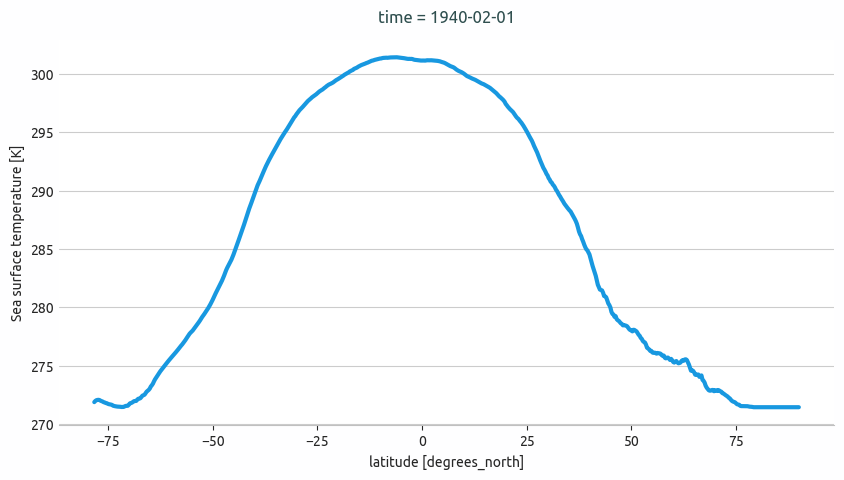

In [6]:
plot_single_profile = plot_lat_lon_profiles(
    mean_type = 'zonal',
    monthly_data = tos_plot,
)

## Single profile with multiple lines

We select other two variables from the ERA5 dataset, `t` and `t_plot`, but the other lines can also be different models for the same variable.

In [7]:
t = data["t"]
t_plot = t.isel(time=1, plev=1)
t2m = data["2t"]
t2m_plot = t2m.isel(time=1)
data_list = [tos_plot, t_plot, t2m_plot]

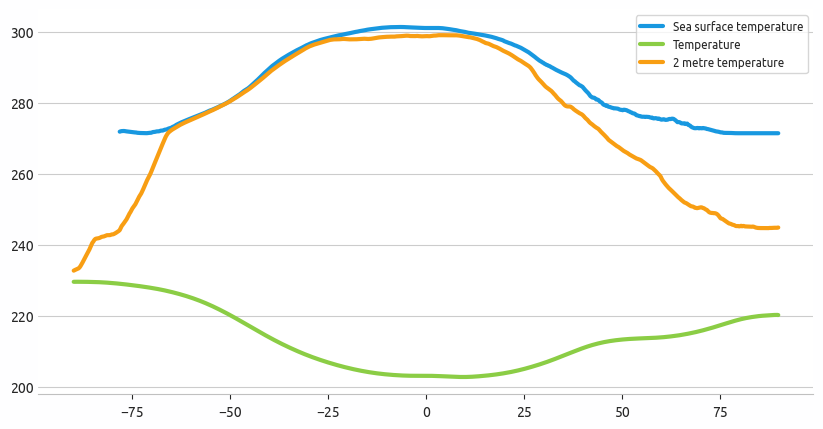

In [8]:
plot_multiple_profiles = plot_lat_lon_profiles(
    mean_type = 'zonal',
    data_list = data_list,
)

In [9]:
from aqua import plot_lines

In [10]:
tos

<xarray.DataArray 'tos' (time: 1008, lat: 721, lon: 1440)> Size: 4GB
dask.array<getitem, shape=(1008, 721, 1440), dtype=float32, chunksize=(12, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 8kB 1940-01-01 1940-02-01 ... 2023-12-01
  * lon      (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float64 6kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
Attributes:
    long_name:     Sea surface temperature
    units:         K
    code:          34
    table:         128
    history:       \n2025-06-04 18:50:59 AQUA💧: Variable renamed tos from SST...
    paramId:       262101
    shortName:     tos
    AQUA_model:    ERA5
    AQUA_exp:      era5
    AQUA_source:   monthly
    AQUA_catalog:  obs
    AQUA_version:  0.16.0-alpha

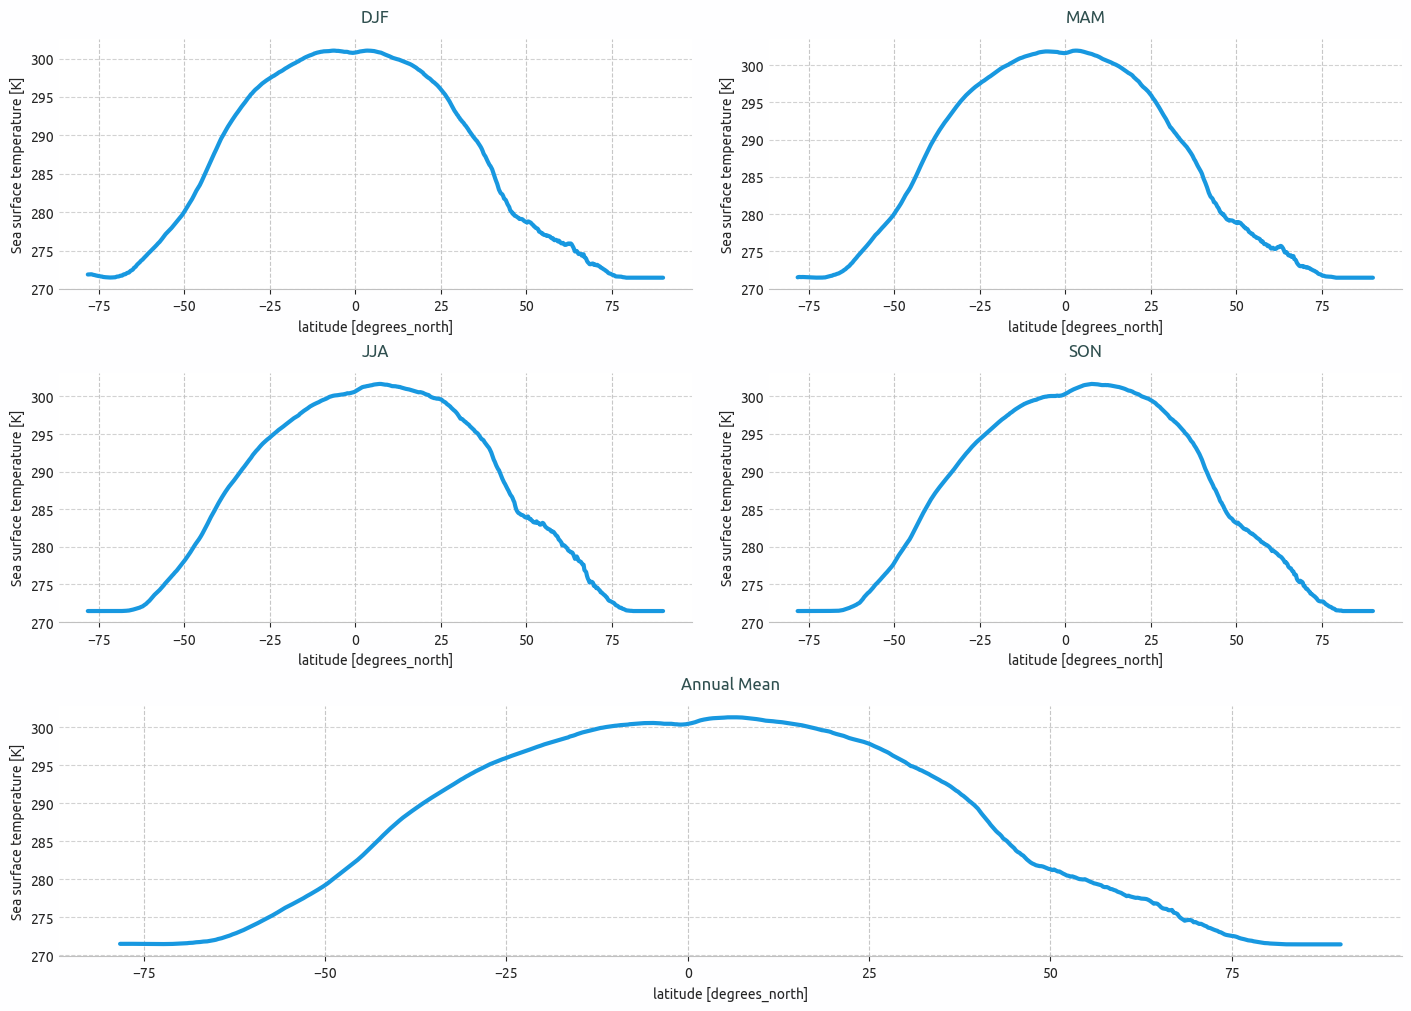

In [11]:
plot_seasonal_profile = plot_lines(tos)

In [12]:
t_single = t.isel(plev=1)
data_list = [tos, t_single, t2m]

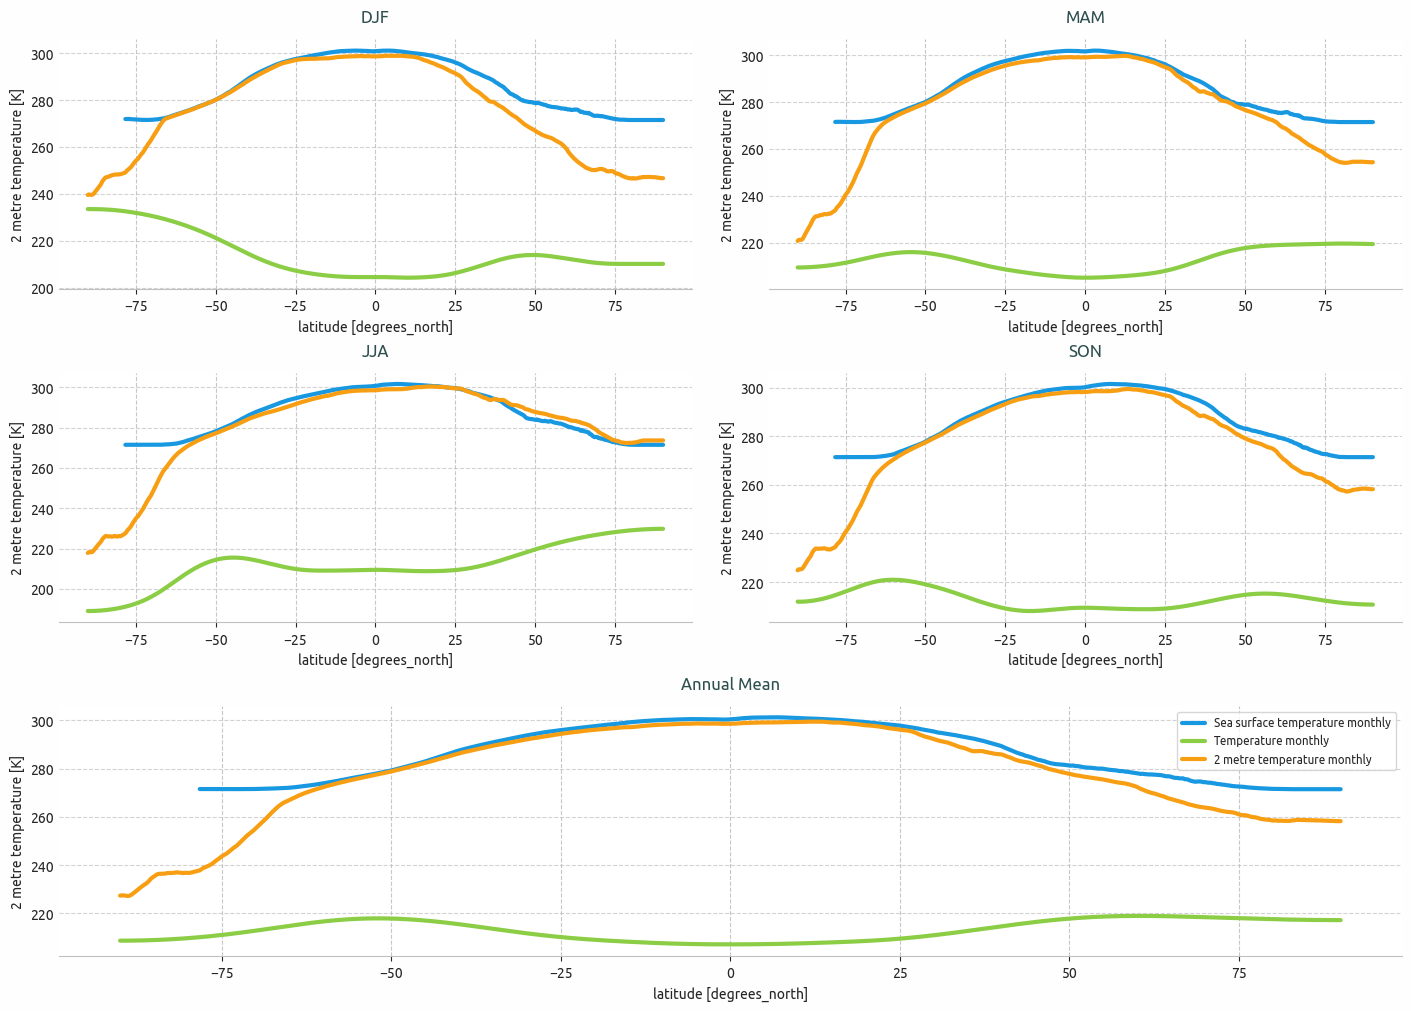

In [13]:
plot_multiple_seasonal_profiles = plot_lines(data_list)